分类准确率: 91.11%


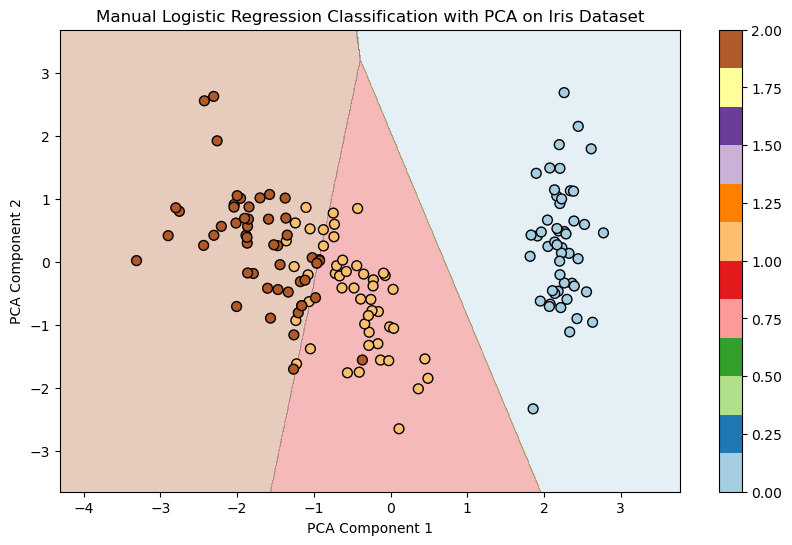

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # 仅用于加载鸢尾花数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
data = load_iris()
X = data.data
y = data.target

# 标准化数据
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 手动实现PCA算法
def pca_manual(X, n_components=2):
    # 计算协方差矩阵
    covariance_matrix = np.cov(X, rowvar=False)
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # 对特征值进行排序，选择最大的特征值对应的特征向量
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    # 转换数据到新空间
    X_pca = np.dot(X, selected_eigenvectors)
    return X_pca

# 使用PCA将数据降至2维
X_pca = pca_manual(X, n_components=2)

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 手动实现对率回归算法
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.num_features = X.shape[1]
        self.weights = np.zeros((self.num_features, self.num_classes))
        self.bias = np.zeros((1, self.num_classes))

        # One-hot encoding of y
        y_one_hot = np.zeros((y.size, self.num_classes))
        y_one_hot[np.arange(y.size), y] = 1

        # Gradient Descent
        for i in range(self.num_iterations):
            # Linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply softmax to get probabilities
            y_pred = self.softmax(linear_model)
            # Compute gradients
            dw = np.dot(X.T, (y_pred - y_one_hot)) / y.shape[0]
            db = np.sum(y_pred - y_one_hot, axis=0) / y.shape[0]
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(linear_model)
        return np.argmax(y_pred, axis=1)

# 初始化和训练对率回归模型
logistic_model = LogisticRegressionManual(learning_rate=0.01, num_iterations=5000)
logistic_model.fit(X_train, y_train)

# 预测测试集
y_pred = logistic_model.predict(X_test)

# 打印分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"分类准确率: {accuracy * 100:.2f}%")

# 绘制分类结果示意图
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Manual Logistic Regression Classification with PCA on Iris Dataset')
plt.colorbar()
plt.show()



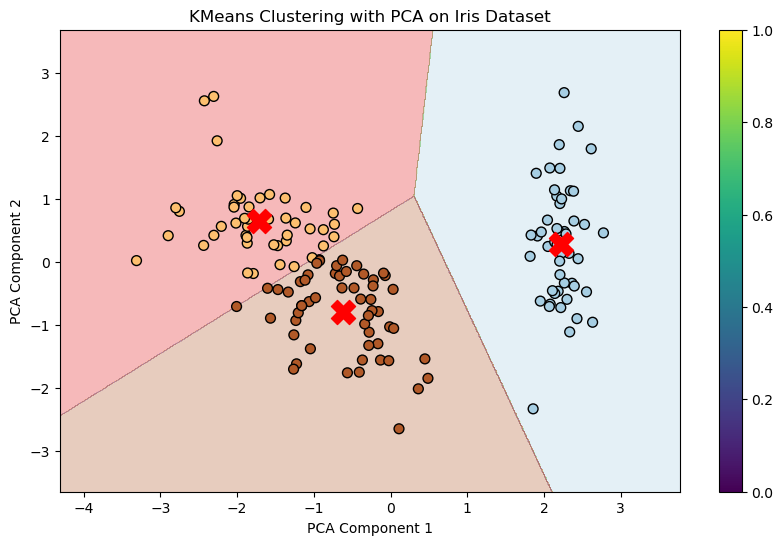

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # 仅用于加载鸢尾花数据集
from sklearn.model_selection import train_test_split

# 加载鸢尾花数据集
data = load_iris()
X = data.data
y = data.target

# 标准化数据
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 手动实现PCA算法
def pca_manual(X, n_components=2):
    # 计算协方差矩阵
    covariance_matrix = np.cov(X, rowvar=False)
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # 对特征值进行排序，选择最大的特征值对应的特征向量
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    # 转换数据到新空间
    X_pca = np.dot(X, selected_eigenvectors)
    return X_pca

# 使用PCA将数据降至2维
X_pca = pca_manual(X, n_components=2)

# 手动实现KMeans算法
class KMeansManual:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def initialize_centroids(self, X):
        # 随机选择k个数据点作为初始质心
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def compute_distances(self, X, centroids):
        # 计算每个点到质心的距离
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return distances

    def update_centroids(self, X, labels):
        # 更新质心位置
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids

    def fit(self, X):
        # 初始化质心
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iters):
            # 计算距离并分配每个点到最近的质心
            distances = self.compute_distances(X, self.centroids)
            labels = np.argmin(distances, axis=1)
            # 计算新的质心
            new_centroids = self.update_centroids(X, labels)
            # 检查质心是否变化很小，如果是则停止迭代
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
        self.labels_ = labels

    def predict(self, X):
        # 根据现有质心分配新的数据点到最近的质心
        distances = self.compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

# 初始化和训练KMeans模型
kmeans_model = KMeansManual(n_clusters=3, max_iters=100)
kmeans_model.fit(X_pca)

# 获取聚类标签
y_pred = kmeans_model.labels_

# 绘制聚类结果示意图
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.scatter(kmeans_model.centroids[:, 0], kmeans_model.centroids[:, 1], s=300, c='red', marker='X')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering with PCA on Iris Dataset')
plt.colorbar()
plt.show()


聚类准确率: 58.00%


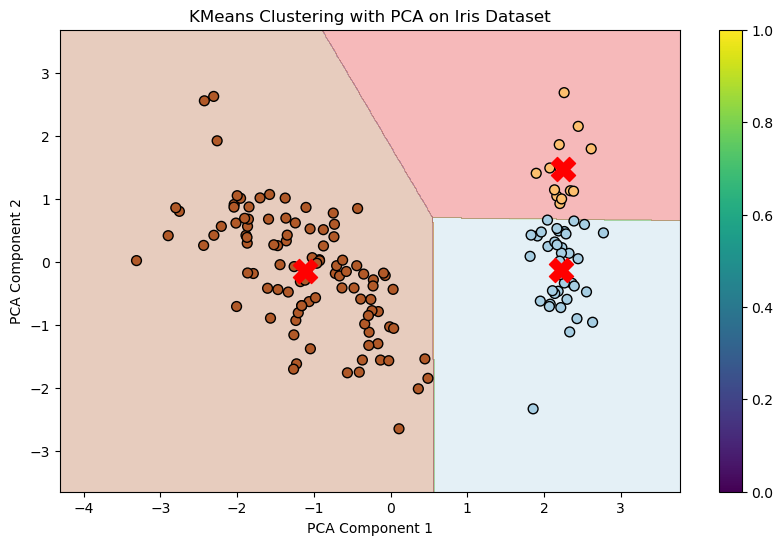

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # 仅用于加载鸢尾花数据集
from sklearn.model_selection import train_test_split
from scipy.optimize import linear_sum_assignment  # 用于实现匈牙利算法

# 加载鸢尾花数据集
data = load_iris()
X = data.data
y = data.target

# 标准化数据
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 手动实现PCA算法
def pca_manual(X, n_components=2):
    # 计算协方差矩阵
    covariance_matrix = np.cov(X, rowvar=False)
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # 对特征值进行排序，选择最大的特征值对应的特征向量
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    # 转换数据到新空间
    X_pca = np.dot(X, selected_eigenvectors)
    return X_pca

# 使用PCA将数据降至2维
X_pca = pca_manual(X, n_components=2)

# 手动实现KMeans算法
class KMeansManual:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def initialize_centroids(self, X):
        # 随机选择k个数据点作为初始质心
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def compute_distances(self, X, centroids):
        # 计算每个点到质心的距离
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return distances

    def update_centroids(self, X, labels):
        # 更新质心位置
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids

    def fit(self, X):
        # 初始化质心
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iters):
            # 计算距离并分配每个点到最近的质心
            distances = self.compute_distances(X, self.centroids)
            labels = np.argmin(distances, axis=1)
            # 计算新的质心
            new_centroids = self.update_centroids(X, labels)
            # 检查质心是否变化很小，如果是则停止迭代
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
        self.labels_ = labels

    def predict(self, X):
        # 根据现有质心分配新的数据点到最近的质心
        distances = self.compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

# 初始化和训练KMeans模型
kmeans_model = KMeansManual(n_clusters=3, max_iters=100)
kmeans_model.fit(X_pca)

# 获取聚类标签
y_pred = kmeans_model.labels_

# 计算准确率：使用匈牙利算法找到最佳标签匹配
def calculate_accuracy(y_true, y_pred):
    # 创建混淆矩阵
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true][pred] += 1

    # 使用匈牙利算法找到最大化准确率的分配方式
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)  # 最大化准确率
    accuracy = confusion_matrix[row_ind, col_ind].sum() / y_true.size
    return accuracy

# 打印聚类的准确率
accuracy = calculate_accuracy(y, y_pred)
print(f"聚类准确率: {accuracy * 100:.2f}%")

# 绘制聚类结果示意图
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.scatter(kmeans_model.centroids[:, 0], kmeans_model.centroids[:, 1], s=300, c='red', marker='X')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering with PCA on Iris Dataset')
plt.colorbar()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # 仅用于加载数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
data = load_iris()
X = data.data
y = data.target

# 标准化数据
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 手动实现PCA算法
def pca_manual(X, n_components=2):
    # 计算协方差矩阵
    covariance_matrix = np.cov(X, rowvar=False)
    # 计算特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # 对特征值进行排序，选择最大的特征值对应的特征向量
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    # 转换数据到新空间
    X_pca = np.dot(X, selected_eigenvectors)
    return X_pca

# 手动实现对率回归算法
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.num_features = X.shape[1]
        self.weights = np.zeros((self.num_features, self.num_classes))
        self.bias = np.zeros((1, self.num_classes))

        # One-hot encoding of y
        y_one_hot = np.zeros((y.size, self.num_classes))
        y_one_hot[np.arange(y.size), y] = 1

        # Gradient Descent
        for i in range(self.num_iterations):
            # Linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply softmax to get probabilities
            y_pred = self.softmax(linear_model)
            # Compute gradients
            dw = np.dot(X.T, (y_pred - y_one_hot)) / y.shape[0]
            db = np.sum(y_pred - y_one_hot, axis=0) / y.shape[0]
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(linear_model)
        return np.argmax(y_pred, axis=1)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 不使用PCA的对率回归模型
logistic_model_without_pca = LogisticRegressionManual(learning_rate=0.01, num_iterations=5000)
logistic_model_without_pca.fit(X_train, y_train)
y_pred_without_pca = logistic_model_without_pca.predict(X_test)

# 打印直接使用对率回归的准确率
accuracy_without_pca = accuracy_score(y_test, y_pred_without_pca)
print(f"不使用PCA的对率回归分类准确率: {accuracy_without_pca * 100:.2f}%")

# 使用PCA将数据降维到2维
X_pca = pca_manual(X, n_components=2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 使用PCA降维后的对率回归模型
logistic_model_with_pca = LogisticRegressionManual(learning_rate=0.01, num_iterations=5000)
logistic_model_with_pca.fit(X_train_pca, y_train_pca)
y_pred_with_pca = logistic_model_with_pca.predict(X_test_pca)

# 打印使用PCA降维后的对率回归准确率
accuracy_with_pca = accuracy_score(y_test_pca, y_pred_with_pca)
print(f"使用PCA降维后的对率回归分类准确率: {accuracy_with_pca * 100:.2f}%")

# 绘制分类结果示意图（仅使用PCA降维的分类结果）
plt.figure(figsize=(12, 6))

# 使用PCA的分类示意图
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = logistic_model_with_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.title('Logistic Regression with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()


ModuleNotFoundError: No module named 'sklearn'

不使用PCA的KMeans聚类结果:
Accuracy: 0.83, NMI: 0.65, AMI: 0.65, ARI: 0.61, FMI: 0.74, Kappa: -0.36, Purity: 0.83

使用PCA降维后的KMeans聚类结果:
Accuracy: 0.82, NMI: 0.65, AMI: 0.64, ARI: 0.60, FMI: 0.73, Kappa: -0.34, Purity: 0.82


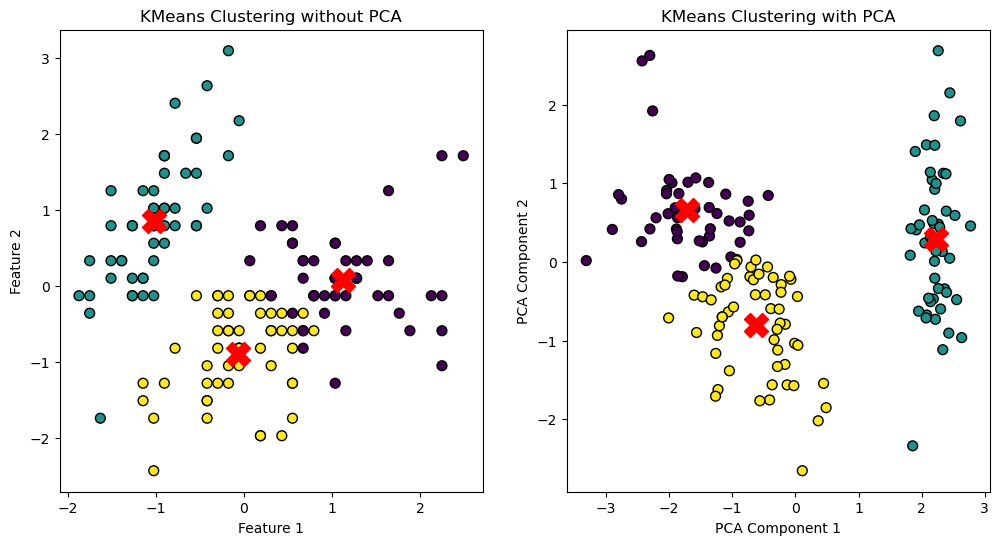

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # 仅用于加载数据集
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score, cohen_kappa_score, confusion_matrix
from scipy.optimize import linear_sum_assignment  # 用于计算最佳标签匹配

# 加载鸢尾花数据集
data = load_iris()
X = data.data
y_true = data.target

# 标准化数据
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 手动实现PCA
def pca_manual(X, n_components=2):
    covariance_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    X_pca = np.dot(X, selected_eigenvectors)
    return X_pca

# 手动实现KMeans算法
class KMeansManual:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def initialize_centroids(self, X):
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def compute_distances(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return distances

    def update_centroids(self, X, labels):
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            distances = self.compute_distances(X, self.centroids)
            labels = np.argmin(distances, axis=1)
            new_centroids = self.update_centroids(X, labels)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
        self.labels_ = labels

    def predict(self, X):
        distances = self.compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

# 计算聚类准确率
def calculate_accuracy(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-confusion)
    accuracy = confusion[row_ind, col_ind].sum() / y_true.size
    return accuracy

# 计算聚类的各项指标
def calculate_metrics(y_true, y_pred):
    acc = calculate_accuracy(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    ami = adjusted_mutual_info_score(y_true, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    fmi = fowlkes_mallows_score(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    return acc, nmi, ami, ari, fmi, kappa

# 计算纯度
def purity_score(y_true, y_pred):
    contingency_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# 不使用PCA的KMeans聚类
kmeans_without_pca = KMeansManual(n_clusters=3, max_iters=100)
kmeans_without_pca.fit(X)
y_pred_without_pca = kmeans_without_pca.labels_

# 使用PCA降维后的KMeans聚类
X_pca = pca_manual(X, n_components=2)
kmeans_with_pca = KMeansManual(n_clusters=3, max_iters=100)
kmeans_with_pca.fit(X_pca)
y_pred_with_pca = kmeans_with_pca.labels_

# 计算不使用PCA的聚类指标
acc_no_pca, nmi_no_pca, ami_no_pca, ari_no_pca, fmi_no_pca, kappa_no_pca = calculate_metrics(y_true, y_pred_without_pca)
purity_no_pca = purity_score(y_true, y_pred_without_pca)

# 计算使用PCA后的聚类指标
acc_with_pca, nmi_with_pca, ami_with_pca, ari_with_pca, fmi_with_pca, kappa_with_pca = calculate_metrics(y_true, y_pred_with_pca)
purity_with_pca = purity_score(y_true, y_pred_with_pca)

# 打印结果
print("不使用PCA的KMeans聚类结果:")
print(f"Accuracy: {acc_no_pca:.2f}, NMI: {nmi_no_pca:.2f}, AMI: {ami_no_pca:.2f}, ARI: {ari_no_pca:.2f}, FMI: {fmi_no_pca:.2f}, Kappa: {kappa_no_pca:.2f}, Purity: {purity_no_pca:.2f}")

print("\n使用PCA降维后的KMeans聚类结果:")
print(f"Accuracy: {acc_with_pca:.2f}, NMI: {nmi_with_pca:.2f}, AMI: {ami_with_pca:.2f}, ARI: {ari_with_pca:.2f}, FMI: {fmi_with_pca:.2f}, Kappa: {kappa_with_pca:.2f}, Purity: {purity_with_pca:.2f}")

# 绘制聚类结果示意图
plt.figure(figsize=(12, 6))

# 不使用PCA的聚类示意图
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_without_pca, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_without_pca.centroids[:, 0], kmeans_without_pca.centroids[:, 1], s=300, c='red', marker='X')
plt.title("KMeans Clustering without PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 使用PCA的聚类示意图
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_with_pca, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_with_pca.centroids[:, 0], kmeans_with_pca.centroids[:, 1], s=300, c='red', marker='X')
plt.title("KMeans Clustering with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()
